In [1]:
cd /Users/carolinecharrier/Projet 5

/Users/carolinecharrier/Projet 5


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
import pandas as pd
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

In [3]:
# import de l'échantillon
data = pd.read_csv("good_df_2.csv")
data.index = data.country
data

,Unnamed: 0,country,conso_volailles_ktons,ratio_conso_volailles_viande_total,ratio_import_conso_volailles,population_growth,ani_prot_share,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,PIB_value_$,political_stability_value,ISO_code,Paris_cities_distance_km
country,,,,,,,,,,,,,
Arménie,0,Arménie,40.0,26.490066,0.800000,-1.943347,48.012436,2924.0,90.06,7717.1,0.11,ARM,3435.0
Afghanistan,1,Afghanistan,75.0,17.441860,0.640000,32.168195,20.957775,2087.0,58.26,1807.8,-2.52,AFG,5586.0
Albanie,2,Albanie,42.0,20.192308,0.595238,-2.037666,53.344707,3188.0,111.37,10492.7,0.09,ALB,1600.0
Algérie,3,Algérie,291.0,32.955832,0.010309,18.801321,27.175805,3293.0,91.92,13322.6,-1.20,DZA,1340.0
Angola,4,Angola,372.0,46.441948,0.919355,39.238700,32.128514,2474.0,57.27,6730.9,-0.39,AGO,6505.0
Antigua-et-Barbuda,5,Antigua-et-Barbuda,5.0,71.428571,1.200000,11.111111,68.068032,2416.0,83.49,20121.3,0.96,ATG,6713.0
Argentine,6,Argentine,1602.0,34.267380,0.002497,9.154596,65.233918,3226.0,102.60,19637.8,0.07,ARG,11058.0
Australie,7,Australie,1077.0,37.137931,0.015785,16.989926,67.466591,3278.0,106.26,43218.3,1.03,AUS,16942.0
Autriche,8,Autriche,158.0,20.153061,0.664557,4.335544,59.190207,3770.0,106.20,44301.1,1.36,AUT,1035.0


In [5]:
# Selection des colonnes pour l'experience 2
data_pca = data[['conso_volailles_ktons',
       'ratio_conso_volailles_viande_total', 'ratio_import_conso_volailles',
       'population_growth', 'ani_prot_share', 'food_supply_kcalcapitaday',
       'protein_supply_quantity_gcapitaday', 'PIB_value_$',
       'political_stability_value', 'Paris_cities_distance_km']]
data_pca = data_pca.fillna(data_pca.mean()) 

### Dendrogramme

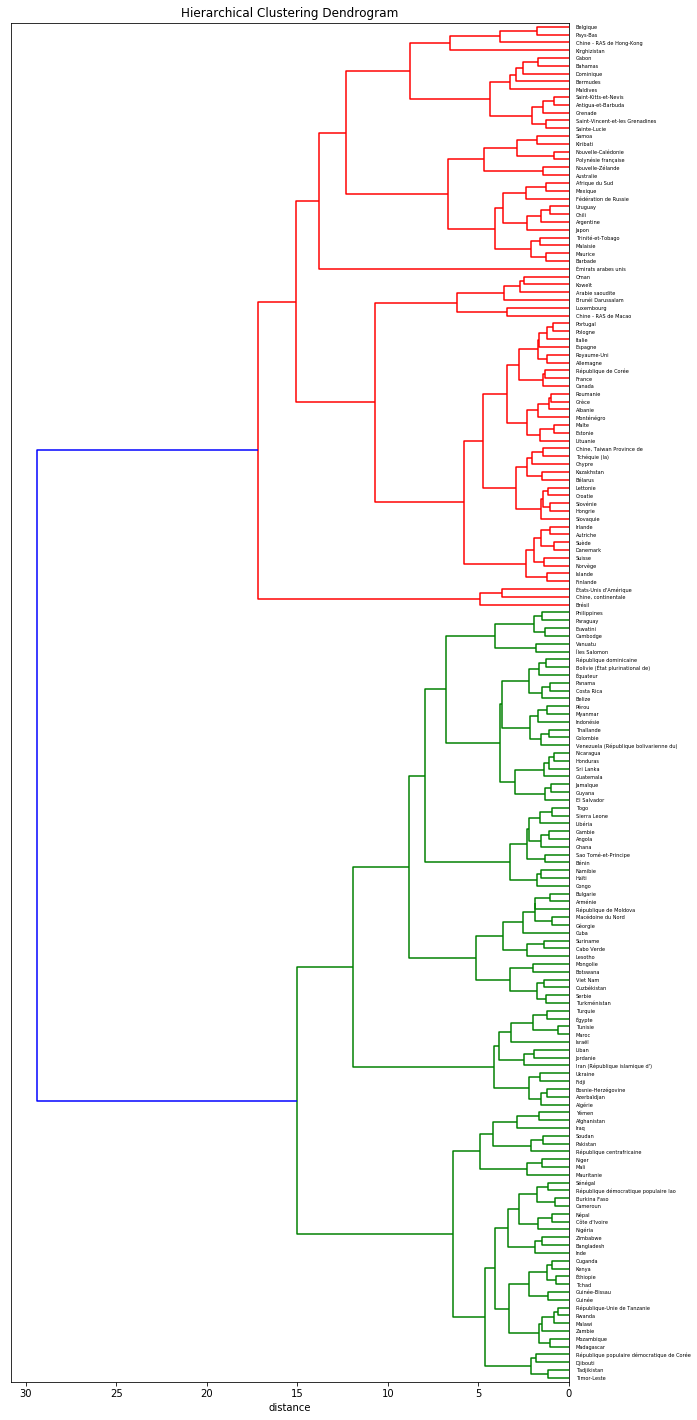

In [6]:
# préparation des données pour le clustering
X = data_pca.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [7]:
## Cluster de dendrogramme 
dendro_cluster = fcluster(Z, 5, criterion = "maxclust")

In [8]:
# Association des pays avec numéro de cluster Dendro
df_dcluster = pd.DataFrame({"Dendro_cluster" : dendro_cluster, "country" : data.country})
df_dcluster.groupby('Dendro_cluster').describe()

country                                            
                 count unique                             top freq
Dendro_cluster                                                    
1                   35     35     République-Unie de Tanzanie    1
2                   64     64  Iran (République islamique d')    1
3                    3      3             Chine, continentale    1
4                   40     40            Chine - RAS de Macao    1
5                   32     32                         Maurice    1

([<matplotlib.patches.Wedge at 0x1a1fb1f940>,
 [Text(0.8875781511414991, 0.6497730570100906, 'cluster 1'),
  Text(-0.8253847722882537, 0.727145087086936, 'cluster 2'),
  Text(-0.9718632739468954, -0.5152492375086275, 'cluster 3'),
  Text(-0.3323545111515746, -1.0485897572059333, 'cluster 4'),
  Text(0.9214543996310632, -0.6007676667402775, 'cluster 5')],
 [Text(0.48413353698627215, 0.3544216674600494, '20.1%'),
  Text(-0.45020987579359284, 0.39662459295651054, '36.8%'),
  Text(-0.5301072403346702, -0.2810450386410695, '1.7%'),
  Text(-0.18128427880994977, -0.5719580493850545, '23.0%'),
  Text(0.5026114907078526, -0.32769145458560583, '18.4%')])

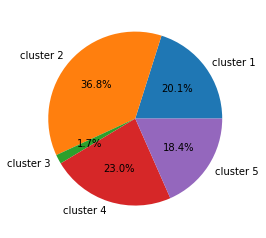

In [10]:
df_pie = df_dcluster.groupby('Dendro_cluster').count()
plt.pie(df_pie.country, labels = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'],autopct = lambda x: str(round(x, 1)) + '%')

In [11]:
data_dcluster  = pd.merge(data_pca,df_dcluster,on='country',how='left')

/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
data_dcluster.loc[data_dcluster['Dendro_cluster'] == 5]

,country,conso_volailles_ktons,ratio_conso_volailles_viande_total,ratio_import_conso_volailles,population_growth,ani_prot_share,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,PIB_value_$,political_stability_value,Paris_cities_distance_km,Dendro_cluster
5,Antigua-et-Barbuda,5.0,71.428571,1.200000,11.111111,68.068032,2416.0,83.49,20121.300000,0.960000,6713.000000,5
6,Argentine,1602.0,34.267380,0.002497,9.154596,65.233918,3226.0,102.60,19637.800000,0.070000,11058.000000,5
7,Australie,1077.0,37.137931,0.015785,16.989926,67.466591,3278.0,106.26,43218.300000,1.030000,16942.000000,5
9,Bahamas,17.0,42.500000,1.117647,19.303797,65.506035,2670.0,86.16,29663.300000,1.130000,7216.000000,5
10,Barbade,12.0,60.000000,0.083333,5.166052,56.917530,2936.0,88.76,16305.200000,1.270000,6884.000000,5
12,Bermudes,2.0,33.333333,2.000000,1.562500,66.710934,2668.0,90.36,50669.300000,0.970000,5753.000000,5
27,Chili,643.0,42.136304,0.125972,10.152538,51.832341,2980.0,87.32,21862.400000,0.360000,11656.000000,5
37,Dominique,2.0,50.000000,2.000000,2.857143,51.363398,2930.0,76.28,10065.500000,1.120000,6828.000000,5
47,Polynésie française,14.0,46.666667,1.142857,11.244980,65.590624,2923.0,97.27,17941.010778,-0.060994,15707.000000,5
50,Gabon,55.0,43.307087,1.272727,27.051672,49.895688,2826.0,86.28,16504.600000,0.330000,5432.000000,5


### Centroides


In [16]:
# Affichage des centroides en considérant la moyenne de chaque variable 
dd_centroids = data_dcluster.groupby('Dendro_cluster').mean().T
dd_centroids

Dendro_cluster,1,2,3,4,5
conso_volailles_ktons,161.685714,330.406250,14435.333333,407.025000,577.468750
ratio_conso_volailles_viande_total,17.940747,44.352672,36.257356,31.251347,50.113695
ratio_import_conso_volailles,0.223645,0.347114,0.012861,0.439432,0.952646
population_growth,26.637137,15.779246,8.622291,8.475896,14.804355
ani_prot_share,22.270252,37.364111,53.055514,56.891013,57.396251
food_supply_kcalcapitaday,2365.714286,2748.296875,3352.000000,3301.000000,2957.968750
protein_supply_quantity_gcapitaday,61.471714,73.699531,100.826667,101.438250,91.151250
PIB_value_$,3990.743473,9357.300337,26221.366667,38559.222769,23817.488174
political_stability_value,-1.046857,-0.317828,-0.053333,0.702250,0.576188
Paris_cities_distance_km,5715.170443,6453.052802,7823.379310,2648.977586,8929.200431


### ACP 

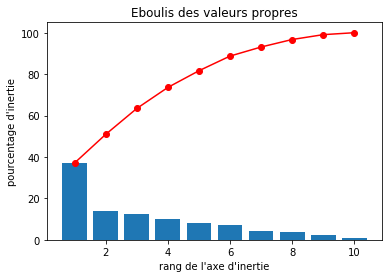

In [17]:
# choix du nombre de composantes à calculer
n_comp = 10

# préparation des données pour l'ACP
X = data_pca.values
names = data.index
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

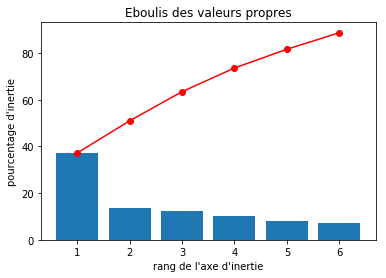

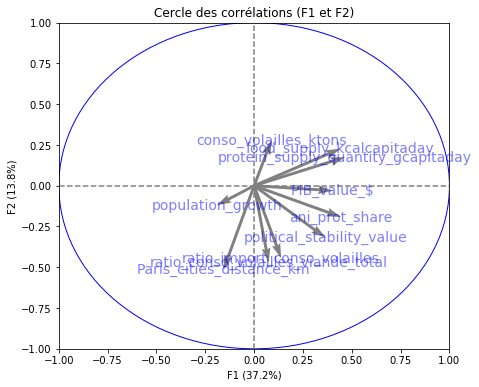

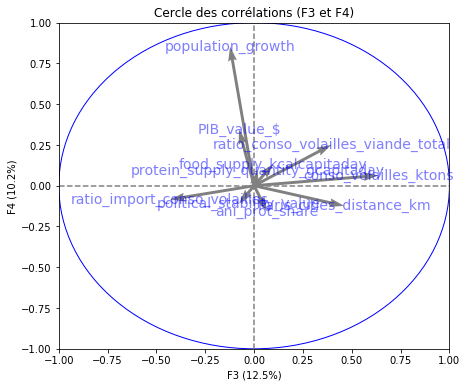

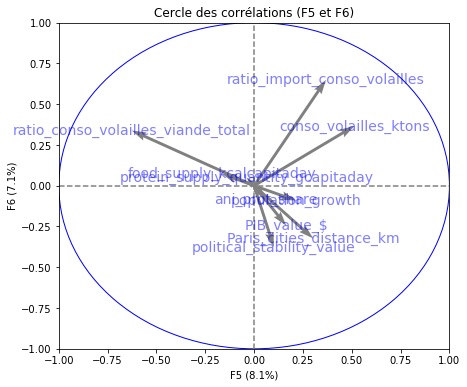

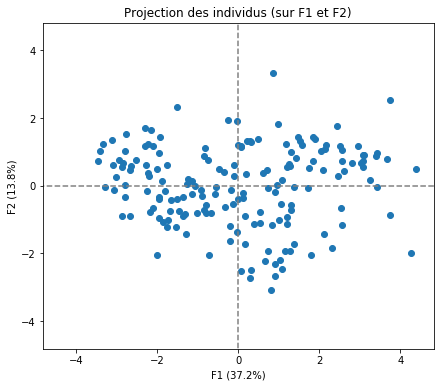

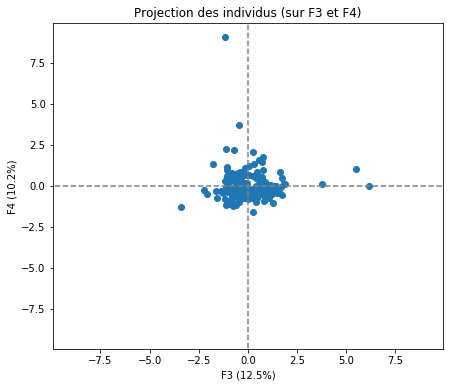

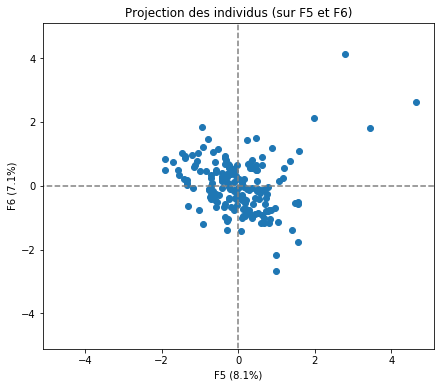

In [18]:
# choix du nombre de composantes à calculer
n_comp = 6

# préparation des données pour l'ACP
X = data_pca.values
names = data.index
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(4,5)], labels = np.array(features))



# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)])
display_factorial_planes(X_projected, n_comp, pca, [(2,3)])
display_factorial_planes(X_projected, n_comp, pca, [(4,5)])


plt.show()

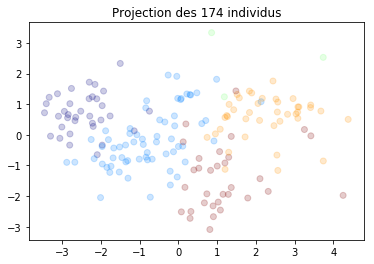

In [19]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_comp).fit(X_scaled)
X_projected = pca.transform(X_scaled)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=dendro_cluster.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus".format(X_projected.shape[0]))
plt.show(block=False)

In [19]:
df_ACP_exp2 = pd.DataFrame(data = pcs,index = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6'], columns = ['conso_volailles_ktons',
       'ratio_conso_volailles_viande_total', 'ratio_import_conso_volailles',
       'population_growth', 'ani_prot_share', 'food_supply_kcalcapitaday',
       'protein_supply_quantity_gcapitaday', 'PIB_value_$',
       'political_stability_value', 'Paris_cities_distance_km']).T.sort_values('principal component 4',ascending = False)


df_ACP_exp2['Total_contribution'] = np.sqrt(df_ACP_exp2['principal component 1']**2 + 
                                            df_ACP_exp2['principal component 2']**2 +
                                            df_ACP_exp2['principal component 3']**2 + 
                                            df_ACP_exp2['principal component 4']**2 + 
                                            df_ACP_exp2['principal component 5']**2 + 
                                            df_ACP_exp2['principal component 6']**2) 



In [20]:
df_ACP_exp2.sort_values('Total_contribution',ascending = False)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,Total_contribution
ratio_import_conso_volailles,0.138545,-0.444855,-0.430749,-0.084698,0.368054,0.649716,0.983567
ratio_conso_volailles_viande_total,0.074608,-0.471206,0.394985,0.250588,-0.627078,0.338728,0.976920
conso_volailles_ktons,0.088873,0.279398,0.636191,0.063394,0.513546,0.366460,0.944850
population_growth,-0.191381,-0.120205,-0.123186,0.853522,0.214210,-0.090705,0.921338
Paris_cities_distance_km,-0.157192,-0.515959,0.460644,-0.123420,0.302627,-0.323206,0.845218
political_stability_value,0.365491,-0.318183,-0.076908,-0.109615,0.100923,-0.375724,0.635695
PIB_value_$,0.401939,-0.030031,-0.077296,0.344684,0.164650,-0.245027,0.611871
food_supply_kcalcapitaday,0.441885,0.227089,0.098490,0.133144,-0.166001,0.074662,0.554428
ani_prot_share,0.445755,-0.192255,0.066390,-0.157296,0.061068,-0.082503,0.524733
protein_supply_quantity_gcapitaday,0.465732,0.175127,0.018392,0.094807,-0.039112,0.050617,0.510876


In [23]:
principalDf = pd.DataFrame(data = X_projected,index = data.index
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6'])

principalDf.sort_values('principal component 5',ascending = False)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
country,,,,,,
"Chine, continentale",0.857311,3.337495,6.170839,-0.014201,4.641145,2.624244
États-Unis d'Amérique,3.740572,2.530273,5.507613,1.015738,3.440473,1.815451
Kirghizistan,0.169482,-1.713638,-3.413735,-1.314944,2.801941,4.111093
Chine - RAS de Hong-Kong,4.254028,-1.976648,-2.067511,-0.483536,1.977261,2.126934
Brésil,1.186925,1.242204,3.761317,0.112528,1.582347,1.077811
Chine - RAS de Macao,3.742130,-0.853292,-1.102860,2.207944,1.569011,-1.771738
Îles Salomon,-2.010221,-2.048978,0.102642,-0.572591,1.564044,-0.561675
Émirats arabes unis,0.671253,-2.221047,-1.151856,9.030899,1.551353,-0.524757
Mongolie,0.112557,-0.370233,-1.067796,-1.068844,1.474372,-0.537244


### Tests statistiques

17941.01
18938.48
358666087.49


Text(0.5, 1.0, 'histogramme')

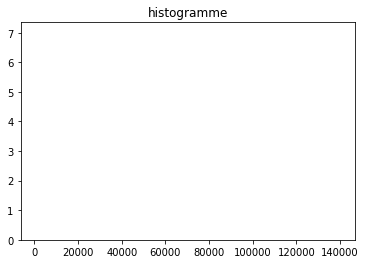

In [44]:
# Calcul de la moyenne, la variance et l’écart-type de l’échantillon : PIB_value_$
import numpy, math
xbar=numpy.mean(data_pca['PIB_value_$'])
print(round(xbar,2))
sprime = numpy.std(data_pca['PIB_value_$'], ddof=1)
print(round(sprime,2))
n_PIB_value = len(data_pca)
sprime2 = numpy.var(data_pca['PIB_value_$'], ddof=1)
print(round(sprime2,2))

# Visualisation de l'histogramme
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data_pca['PIB_value_$'],bins=range(675,140000))
plt.title("histogramme")